In [1]:
import pandas as pd
import numpy as np
data = pd.DataFrame({
    'x0':[1,2,3,4,5],
    'x1':[0.01,0.,3.6,1.3,-2.],
    'y':[-1.5,0.,3.6,1.3,-2.]
})

In [2]:
data

,x0,x1,y
0,1,0.01,-1.5
1,2,0.00,0.0
2,3,3.60,3.6
3,4,1.30,1.3
4,5,-2.00,-2.0


In [3]:
data.columns

Index(['x0', 'x1', 'y'], dtype='object')

In [4]:
data.values

array([[ 1.  ,  0.01, -1.5 ],
       [ 2.  ,  0.  ,  0.  ],
       [ 3.  ,  3.6 ,  3.6 ],
       [ 4.  ,  1.3 ,  1.3 ],
       [ 5.  , -2.  , -2.  ]])

In [5]:
df2 = pd.DataFrame(data.values,columns = ['one','two','three'])

In [6]:
df2

,one,two,three
0,1.0,0.01,-1.5
1,2.0,0.00,0.0
2,3.0,3.60,3.6
3,4.0,1.30,1.3
4,5.0,-2.00,-2.0


In [7]:
#笔记:最好当数据是均匀的时候使用.values属性。
#例如，全是数值类型。如果数据是不均匀的，结果会是Python对象的ndarray：

In [8]:
df3 = data.copy()
df3['strings'] = ['a','b','c','d','e']
df3

,x0,x1,y,strings
0,1,0.01,-1.5,a
1,2,0.00,0.0,b
2,3,3.60,3.6,c
3,4,1.30,1.3,d
4,5,-2.00,-2.0,e


In [9]:
df3.values

array([[1, 0.01, -1.5, 'a'],
       [2, 0.0, 0.0, 'b'],
       [3, 3.6, 3.6, 'c'],
       [4, 1.3, 1.3, 'd'],
       [5, -2.0, -2.0, 'e']], dtype=object)

In [10]:
model_cols = ['x0','x1']
data.loc[:,model_cols].values

array([[ 1.  ,  0.01],
       [ 2.  ,  0.  ],
       [ 3.  ,  3.6 ],
       [ 4.  ,  1.3 ],
       [ 5.  , -2.  ]])

In [11]:
#假设数据集中有一个非数值列：
data['category'] = pd.Categorical(['a','b','a','a','b'],
                                 categories = ['a','b'])
data

,x0,x1,y,category
0,1,0.01,-1.5,a
1,2,0.00,0.0,b
2,3,3.60,3.6,a
3,4,1.30,1.3,a
4,5,-2.00,-2.0,b


In [12]:
#如果我们想替换category列为虚变量，我们可以创建虚变量，
#删除category列，然后添加结果：
dummies = pd.get_dummies(data.category,prefix = 'category')
data_with_dummies = data.drop('category',
                             axis = 1).join(dummies)
data_with_dummies

,x0,x1,y,category_a,category_b
0,1,0.01,-1.5,1,0
1,2,0.00,0.0,0,1
2,3,3.60,3.6,1,0
3,4,1.30,1.3,1,0
4,5,-2.00,-2.0,0,1


In [13]:
#13.2 用Patsy创建模型描述
data = pd.DataFrame({
    'x0':[1,2,3,4,5],
    'x1':[0.01,0.,3.6,1.3,-2.],
    'y':[-1.5,0.,3.6,1.3,-2.]
})
data

,x0,x1,y
0,1,0.01,-1.5
1,2,0.00,0.0
2,3,3.60,3.6
3,4,1.30,1.3
4,5,-2.00,-2.0


In [14]:
import patsy

In [15]:
y,X = patsy.dmatrices('y ~ x0 + x1',data)
y

DesignMatrix with shape (5, 1)
     y
  -1.5
   0.0
   3.6
   1.3
  -2.0
  Terms:
    'y' (column 0)

In [16]:
X

DesignMatrix with shape (5, 3)
  Intercept  x0     x1
          1   1   0.01
          1   2   0.00
          1   3   3.60
          1   4   1.30
          1   5  -2.00
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'x1' (column 2)

In [17]:
#这些Pasty的DesignMatrix实例是NumPy的ndarray，带有附加元数据：
np.asarray(y)


array([[-1.5],
       [ 0. ],
       [ 3.6],
       [ 1.3],
       [-2. ]])

In [18]:
np.asarray(X)

array([[ 1.  ,  1.  ,  0.01],
       [ 1.  ,  2.  ,  0.  ],
       [ 1.  ,  3.  ,  3.6 ],
       [ 1.  ,  4.  ,  1.3 ],
       [ 1.  ,  5.  , -2.  ]])

In [19]:
#关于Intercept。这是线性模型（比如普通最小二乘法胡桂）的管理用法。
#添加 +0 到模型可以不显示intercept：
patsy.dmatrices('y ~ x0 + x1 + 0',data)[1]

DesignMatrix with shape (5, 2)
  x0     x1
   1   0.01
   2   0.00
   3   3.60
   4   1.30
   5  -2.00
  Terms:
    'x0' (column 0)
    'x1' (column 1)

In [20]:
#Patsy对象可以直接传递到算法（比如numpy.linalg.lstsq）中，
#它执行普通最小二乘回归：
coef,resid,_,_ = np.linalg.lstsq(X,y)
#模型的元数据保留在design_info属性中，因此你可以重新附加列名到拟合系数，
#以便获得一个Series，例如
coef

D:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[-1.35327385],
       [ 0.33026501],
       [ 1.10391548]])

In [21]:
coef = pd.Series(coef.squeeze(),
                 index = X.design_info.column_names)
coef

Intercept   -1.353274
x0           0.330265
x1           1.103915
dtype: float64

In [22]:
#Patsy公式进行数据转换
y,X = patsy.dmatrices('y ~ x0 +np.log(np.abs(x1)+1)',data)
X

DesignMatrix with shape (5, 3)
  Intercept  x0  np.log(np.abs(x1) + 1)
          1   1                 0.00995
          1   2                 0.00000
          1   3                 1.52606
          1   4                 0.83291
          1   5                 1.09861
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'np.log(np.abs(x1) + 1)' (column 2)

In [23]:
#常见的变量转换包括标准化（平均值为0，方差为1）和去中心化（减去平均值）。
#Patsy有内置的函数进行这样的工作：
y,X = patsy.dmatrices('y ~ standardize(x0) + center(x1)',data)
X

DesignMatrix with shape (5, 3)
  Intercept  standardize(x0)  center(x1)
          1         -1.41421      -0.572
          1         -0.70711      -0.582
          1          0.00000       3.018
          1          0.70711       0.718
          1          1.41421      -2.582
  Terms:
    'Intercept' (column 0)
    'standardize(x0)' (column 1)
    'center(x1)' (column 2)

In [24]:
#patsy.build_design_matrices函数可以应用于转换新数据，
#使用原始样本数据集的保存信息：
new_data = pd.DataFrame({
    'x0':[6,7,8,9],
    'x1':[3.1,-0.5,0,2.3],
    'y':[1,2,3,4]
})
new_X = patsy.build_design_matrices([X.design_info],
                                   new_data)
new_X

[DesignMatrix with shape (4, 3)
   Intercept  standardize(x0)  center(x1)
           1          2.12132       2.518
           1          2.82843      -1.082
           1          3.53553      -0.582
           1          4.24264       1.718
   Terms:
     'Intercept' (column 0)
     'standardize(x0)' (column 1)
     'center(x1)' (column 2)]

In [25]:
#因为Patsy中的加号不是加法的意义，
#当你按照名称将数据集的列相加时，你必须用特殊I函数将它们封装起来：
y,X=patsy.dmatrices('y ~ I(x0+x1)',data)
X

DesignMatrix with shape (5, 2)
  Intercept  I(x0 + x1)
          1        1.01
          1        2.00
          1        6.60
          1        5.30
          1        3.00
  Terms:
    'Intercept' (column 0)
    'I(x0 + x1)' (column 1)

In [26]:
#Patsy的patsy.builtins模块还有一些其他的内置转换。记得查看线上文档。
#分类数据有一个特殊的转换类，下面进行讲解。

In [27]:
#分类数据和Patsy

In [28]:
#非数值数据可以用多种方式转换为模型设计矩阵。
#当你在Patsy公式中使用非数值数据，它们会默认转换成虚变量。
#如果有截距，会去掉一个，避免共线性。：
data = pd.DataFrame({
    'key1':['a','a','b','b','a','b','a','b'],
    'key2':[0,1,0,1,0,1,0,0],
    'v1':[1,2,3,4,5,6,7,8],
    'v2':[-1,0,2.5,-0.5,4.0,-1.2,0.2,-1.7]
})
y,X = patsy.dmatrices('v2 ~ key1',data)
X

DesignMatrix with shape (8, 2)
  Intercept  key1[T.b]
          1          0
          1          0
          1          1
          1          1
          1          0
          1          1
          1          0
          1          1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)

In [29]:
#如果你从模型中忽略截距，每个分类值的列都会包括在设计矩阵的模型中：
y,X = patsy.dmatrices('v2 ~ key1 + 0',data)

In [30]:
X

DesignMatrix with shape (8, 2)
  key1[a]  key1[b]
        1        0
        1        0
        0        1
        0        1
        1        0
        0        1
        1        0
        0        1
  Terms:
    'key1' (columns 0:2)

In [32]:
#使用C函数，数值列可以截取为分类量：
y,X = patsy.dmatrices('v2 ~ C(key2)',data)
X

DesignMatrix with shape (8, 2)
  Intercept  C(key2)[T.1]
          1             0
          1             1
          1             0
          1             1
          1             0
          1             1
          1             0
          1             0
  Terms:
    'Intercept' (column 0)
    'C(key2)' (column 1)

In [33]:
#当你在模型中使用多个分类名，事情就会变得复杂，
#因为会包括key1:key2形式的相交部分，它可以用在方差（anova）模型分析中：
data['key2'] = data['key2'].map({0:'zero',1:'one'})
data

,key1,key2,v1,v2
0,a,zero,1,-1.0
1,a,one,2,0.0
2,b,zero,3,2.5
3,b,one,4,-0.5
4,a,zero,5,4.0
5,b,one,6,-1.2
6,a,zero,7,0.2
7,b,zero,8,-1.7


In [34]:
y,X = patsy.dmatrices('v2 ~ key1 + key2',data)
X

DesignMatrix with shape (8, 3)
  Intercept  key1[T.b]  key2[T.zero]
          1          0             1
          1          0             0
          1          1             1
          1          1             0
          1          0             1
          1          1             0
          1          0             1
          1          1             1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)
    'key2' (column 2)

In [35]:
y,X = patsy.dmatrices('v2 ~key1 + key2 + key1:key2',data)
X

DesignMatrix with shape (8, 4)
  Intercept  key1[T.b]  key2[T.zero]  key1[T.b]:key2[T.zero]
          1          0             1                       0
          1          0             0                       0
          1          1             1                       1
          1          1             0                       0
          1          0             1                       0
          1          1             0                       0
          1          0             1                       0
          1          1             1                       1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)
    'key2' (column 2)
    'key1:key2' (column 3)

In [36]:
#Patsy提供转换分类数据的其他方法，包括以特定顺序转换。
#13.3 statsmodels介绍

In [37]:
#估计线性模型
#statsmodels有多种线性回归模型，包括从基本（比如普通最小二乘法）
#到复杂（比如迭代加权最小二乘法）的。
#statsmodels的线性模型有两种不同的接口：基于数组，和基于公式。
#他们可以通过API模块引入：
import statsmodels.api as sm
import statsmodels.formula.api as smf
def dnorm(mean,variance,size=1):
    if isinstance(size,int):
        size = size
    return mean + np.sqrt(variance) * np.random.randn(size)

In [38]:
np.random.seed(12345)

In [39]:
N =100
X = np.c_[dnorm(0,0.4,size = N),
         dnorm(0,0.6,size = N),
         dnorm(0,0.2,size = N)]
eps = dnorm(0,0.1,size = N)
beta = [0.1,0.3,0.5]
y = np.dot(X,beta) + eps

In [40]:
X[:5]

array([[-0.12946849, -1.21275292,  0.50422488],
       [ 0.30291036, -0.43574176, -0.25417986],
       [-0.32852189, -0.02530153,  0.13835097],
       [-0.35147471, -0.71960511, -0.25821463],
       [ 1.2432688 , -0.37379916, -0.52262905]])

In [42]:
y[:5]

array([ 0.42786349, -0.67348041, -0.09087764, -0.48949442, -0.12894109])

In [43]:
#像之前Patsy看到的，线性模型通常要你和一个截距。sm.add_constant函数
#可以添加一个截距的列到现存的矩阵
X_model = sm.add_constant(X)
X_model[:5]

array([[ 1.        , -0.12946849, -1.21275292,  0.50422488],
       [ 1.        ,  0.30291036, -0.43574176, -0.25417986],
       [ 1.        , -0.32852189, -0.02530153,  0.13835097],
       [ 1.        , -0.35147471, -0.71960511, -0.25821463],
       [ 1.        ,  1.2432688 , -0.37379916, -0.52262905]])

In [44]:
#sm.OLS类可以拟合一个普通最小二乘回归：
model = sm.OLS(y,X)
#这个模型的fit方法返回了一个回归结果对象，它包括估计的模型参数和其他内容：
results = model.fit()
results.params

array([0.17826108, 0.22303962, 0.50095093])

In [45]:
#对结果的summary方法可以打印模型的详细诊断结果：
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     24.42
Date:                Fri, 15 Mar 2019   Prob (F-statistic):           7.44e-12
Time:                        23:26:46   Log-Likelihood:                -34.305
No. Observations:                 100   AIC:                             74.61
Df Residuals:                      97   BIC:                             82.42
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1783      0.053      3.364      0.0

In [46]:
#这里的参数名为原始的名字x1,x2等等。假设所有的模型参数都在一个DataFrame中：
data = pd.DataFrame(X,columns = ['col0','col1','col2'])
data['y'] = y
data[:5]


,col0,col1,col2,y
0,-0.129468,-1.212753,0.504225,0.427863
1,0.302910,-0.435742,-0.254180,-0.673480
2,-0.328522,-0.025302,0.138351,-0.090878
3,-0.351475,-0.719605,-0.258215,-0.489494
4,1.243269,-0.373799,-0.522629,-0.128941


In [47]:
#现在我们使用statsmodels的公式API和Patsy的公式字符串
results = smf.ols('y ~ col0 + col1 + col2',data = data).fit()
results.params

Intercept    0.033559
col0         0.176149
col1         0.224826
col2         0.514808
dtype: float64

In [48]:
results.tvalues

Intercept    0.952188
col0         3.319754
col1         4.850730
col2         6.303971
dtype: float64

In [49]:
#观察下statsmodels是如何返回Series结果的，附带有DataFrame的列名。
#当使用公式和pandas对象时，我们不需要使用add_constant
#给出一个样本外数据，你可以根据估计的模型参数计算预测值：
results.predict(data[:5])

0   -0.002327
1   -0.141904
2    0.041226
3   -0.323070
4   -0.100535
dtype: float64

In [50]:
#statamodels的线性模型结果还有其他的分析、诊断和可视化工具。
#除了普通的最小二乘模型，还有其他的线性模型

In [52]:
#估计时间序列过程
#statsmodels的另一模型类是进行时间序列分析，
#包括自回归过程、卡尔曼滤波和其他态空间模型，还有多元自回归模型
#用自回归结构和噪声来模拟一些时间序列数据：
init_x = 4
import random
values = [init_x,init_x]
N = 1000
b0 = 0.8
b1 = -0.4
noise = dnorm(0,0.1,N)
for i in range(N):
    new_x = values[-1] * b0 + values[-2] * b1 + noise[i]
    values.append(new_x)
#这个数据有AR（2）结构（两个延迟），参数是0.8和-0.4.当你和AR模型，
#你可能不知道滞后项的个数，因此可以用较多的滞后量来拟合这个模型：

In [53]:
MAXLAGS = 5
model = sm.tsa.AR(values)
results = model.fit(MAXLAGS)
#结果中的估计参数首先是截距，其次是前两个参数的估计值：
results.params

array([ 0.00791554,  0.71074082, -0.31689896, -0.06724519,  0.0041215 ,
       -0.00079061])

In [54]:
#13.4 scikit-learn介绍
#大概是泰坦尼克号预测
#用kaggle竞赛的经典数据集
train = pd.read_csv('datasets/titanic/train.csv')
test = pd.read_csv('datasets/titanic/test.csv')
train[:4]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [55]:
#statamodels和scikit-learn通常不能接受缺失数据，
#因此我们要查看列是否包含缺失值：
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [57]:
#在统计和机器学习的例子中，根据数据中的特征，
#一个典型的任务就是预测乘客能否生还。
#模型先在训练数据集中拟合，然后用样本外测试数据集评估。
#我想用年龄作为预测值，但是它包含缺失值。缺失数据补全的方法有很多，
#我用的是一种简单方法，用训练数据集的中位数补全两个表的空值：
impute_value = train['Age'].median()
train['Age'] = train['Age'].fillna(impute_value)
test['Age'] = test['Age'].fillna(impute_value)
#现在我们需要指定一个模型。我增加了一个列IsFemale,作为‘Sex’列的编码：
train['IsFemale'] = (train['Sex'] == 'female').astype(int)
test['IsFemale'] = (test['Sex'] == 'female').astype(int)
#然后，我们确定一些模型变量，并创建NumPy数组：
predictors = ['Pclass','IsFemale','Age']
X_train = train[predictors].values
X_test = test[predictors].values
y_train = train['Survived'].values
X_train[:5]

array([[ 3.,  0., 22.],
       [ 1.,  1., 38.],
       [ 3.,  1., 26.],
       [ 1.,  1., 35.],
       [ 3.,  0., 35.]])

In [58]:
y_train[:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [60]:
#下面用scikit-learn的LogistcRegression模型，创建一个模型实例：
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#与statsmodels类似，我们可以用模型的fit方法，将它拟合到训练数据中：
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
#现在，我们可以用model.predict，对测试数据进行预测：
y_predict = model.predict(X_test)
y_predict[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [63]:
#如果你有测试数据集的真实值，你可以计算准确率或其他错误度量值：
#在实际中，模型训练经常有许多额外的复杂因素。许多模型有可以调节的参数，
#有些方法（比如交叉验证）可以用来进行参数调节，避免对续联数据过拟合。
#这通常可以提高预测性或者对新数据的健壮性。

In [64]:
#交叉验证通过分割训练数据来模拟样本外预测。基于模型的精度得分（比如均方差
#），可以对模型参数进行网格搜索。有些模型，如logis回归，
#有内置的交叉验证的估计类。
#例如，logisticregressioncv类
#可以用一个参数指定网格搜索对模型的正则化参数C的粒度：

In [65]:
from sklearn.linear_model import LogisticRegressionCV
model_cv = LogisticRegressionCV(10)
model_cv.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [66]:
#要手动进行交叉验证，你可以使用cross_val_score帮助函数，
#他可以处理数据分割。
#例如，要交叉验证我们的带有四个不重叠训练数据的模型，可以这样做：
from sklearn.model_selection import cross_val_score
model = LogisticRegression(C=10)
scores = cross_val_score(model,X_train,y_train,cv = 4)
scores

array([0.77232143, 0.80269058, 0.77027027, 0.78828829])

In [67]:
#默认的评分标准取决于模型本身，但是可以明确指定一个评分。
#交叉验证过的模型需要更长时间来训练，但会有更高的模型性能。

In [68]:
#13.5 继续学习（PS：见电子书详细）

In [69]:
#第14章 数据分析案例

In [70]:
#14.1 来自Bitly的USA.gov数据

In [71]:
path = 'datasets/bitly_usagov/example.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [72]:
#Python有内置或第三方模块可以将JSON字符串转换成Python字典对象。
#这里我将使用json模块机器loads函数逐行加载已经下载好的数据文件：
import json
path = 'datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [73]:
#用纯Python代码对时区进行计数

In [74]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

In [75]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [76]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [77]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else :
            counts[x] = 1
    return counts

In [78]:
#如果使用的是Python标准库的更高级工具，那么你可能会将代码写的更简洁一些：
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts

In [79]:
counts = get_counts(time_zones)
counts['America/New_York']

1251

In [80]:
len(time_zones)

3440

In [81]:
def top_counts(count_dict,n=10):
    value_key_pairs = [(count,tz) for tz,count in 
                      count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [82]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [83]:
#如果要搜索Python的简单库，你能找到collections.Counter类，
#它可以是这项工作更简单
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [84]:
#用pandas对时区进行计数
#从原始记录的几何创建DataFrame，与将记录列表传递到pandas.DataFrame一样简单：
import pandas as pd
frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [85]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [87]:
#这里frame的输出形式是摘要视图（summary view），
#主要用于较大的DataFrame对象。
#我们然后可以对Series使用value_counts方法：
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [90]:
#我们可以用matplotlib可视化这个数据。
#为此，我们先给记录中位置或缺失的时区天上一个替代值。
#fillna函数可以替换缺失值（NA），
#而未知值（空字符串）则可以通过布尔型数组索引加以替换：
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

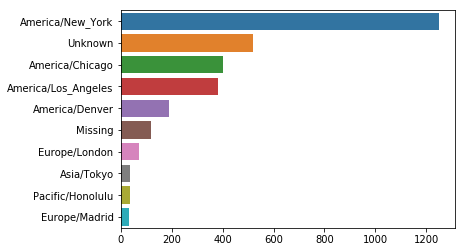

In [91]:
#此时，我们可以用seaborn包创建水平柱状图
import seaborn as sns
subset = tz_counts[:10]
sns.barplot(y = subset.index , x = subset.values)

In [92]:
#a字段含有执行url短缩操作的浏览器、设备、应用程序的相关信息：
frame['a'][1]

'GoogleMaps/RochesterNY'

In [93]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [95]:
frame['a'][51][:50]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [96]:
#将这些‘agent’字符串中的所有信息都解析出来时意见挺郁闷的工作。
#一种策略是将这种字符串的第一节（与浏览器大致对应）
#分离出来并得到另外一份用户行为摘要
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [99]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [101]:
#现在假设你想按照Windows和非Windows用户对时区统计信息进行分解。
#为了简单起见，我们假定只要agent字符串含有‘Windows’就认为该用户为
#Windows用户。
#由于有的agent缺失，所以首先将他们从数据中移除：
cframe = frame[frame.a.notnull()]
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),
                       'Windows','Not Windows')
cframe['os'][:5]

D:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [114]:
#接下来就可以根据时区和新得到的操作系统列表对数据进行分组：
by_tz_os = cframe.groupby(['tz','os'])
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [115]:
#最后，我们来选取最常出现的时区。
#为了达到这个目的，我根据agg_counts中的行数构造了一个间接索引数组：
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [116]:
#然后我通过take按照这个顺序截取了最后10行最大值：
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [117]:
#pandas有一个简便方法nlargest，可以做同样的工作：
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

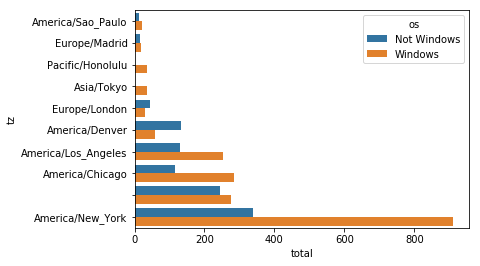

In [118]:
#然后，如这段代码所示，可以用柱状图表示。
#我传递一个额外参数到seaborn的barplot函数，来画一个堆积条形图：
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset[:10]
sns.barplot(x = 'total' , y = 'tz' , hue = 'os' , data = count_subset)

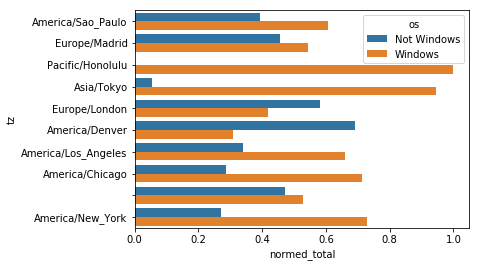

In [121]:
#这张图不容易看出Windows用户在小分组的相对比例，因此标准化分组百分比之和为1：
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group
results = count_subset.groupby('tz').apply(norm_total)
sns.barplot(x = 'normed_total' , y = 'tz',hue = 'os',data = results)

In [122]:
#我们还可以用groupby的transform方法，更高效的计算标准化的和：
g = count_subset.groupby('tz')
results2 = count_subset.total / g.total.transform('sum')

In [123]:
#14.2 Movie 1M数据集

In [134]:
import pandas as pd
pd.options.display.max_rows = 10
unames = ['user_id','gender','age','occupation','zip']
users = pd.read_table('datasets/movielens/users.dat',sep = '::',
                     header = None,names = unames)
rnames = ['user_id','movie_id','rating','timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat',sep = '::',
                       header = None , names = rnames)
mnames = ['movie_id','title','genres']
movies = pd.read_table('datasets/movielens/movies.dat',sep = '::',
                       header = None , names = mnames)

D:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
D:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
D:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()


In [135]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [136]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [137]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [138]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [139]:
data = pd.merge(pd.merge(ratings,users),movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [140]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [141]:
#为了按性别计算每部电影的平均得分，我们可以使用pivot_table方法：
mean_ratings = data.pivot_table('rating',index = 'title',
                                columns = 'gender',aggfunc = 'mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [142]:
#该操作产生了另一个DataFrame,其内容为电影平均得分，行标为电影名称（索引），列表为性别。
#现在，我打算过滤掉评分数据不够250条的电影（随便选的一个数字）。
#为了达到目的，我先对title进行分组，然后利用size（）得到一个含有各电影分组大小的Series对象：
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [143]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [144]:
#标题索引中含有评分数据大于250条的电影名称，
#然后我们就可以据此从前面的mean_ratings鸿选取所需的行了：
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [145]:
#为了了解女性观众最喜欢的电影，我们可以对F列进行排列：
top_female_ratings = mean_ratings.sort_values(by = 'F',ascending = False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [148]:
#计算评分分歧
#及宿舍我们想要找出男性和女性观众分歧最大的电影。
#一个方法是给mean_ratings加上一个用于存放平均得分之差的列，并对其进行排列
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by = 'diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [149]:
#对排序结果反序并取出前10行，得到的则是男性观众更喜欢的电影：
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [152]:
#如果只是想要找出分歧最大的电影（不考虑性别因素），
#则可以计算得分数据的方差或标准差：
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.sort_values(ascending = False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [153]:
#可能你已经注意到了，电影分类是以竖线（|）分隔的字符串形式给出的。
#如果想对电影进行分类的话，就需要先将其转换成更有用的形式才行。

In [154]:
#14.3 1880-2010年间全美婴儿姓名

In [156]:
import pandas as pd 
names1880 = pd.read_csv('datasets/babynames/yob1880.txt',
                       names =['name','sex','births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [157]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [161]:
years = range(1880,2011)
pieces = []
columns = ['names','sex','births']
for year in years:
    path = 'datasets/babynames/yob%d.txt' %year
    frame = pd.read_csv(path,names = columns)
    frame['year'] = year
    pieces.append(frame)
names = pd.concat(pieces , ignore_index = True)

In [162]:
names

,names,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [163]:
total_births = names.pivot_table('births',index = 'year',columns = 'sex',
                                aggfunc = sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


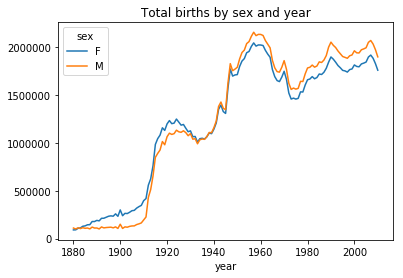

In [164]:
total_births.plot(title = 'Total births by sex and year')

In [165]:
#下面我们来插入一个prop列，用于存放指定名字的婴儿数相对于总出生数的比例。
#prop值为0.02表示没100个婴儿中有2个去了当前这个名字。
#因此，我们先按year和sex分组，然后再将新列添加到各个分组上：
def add_prop(group):
    group['prop'] = group.births/group.births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)
names

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [166]:
#在执行这样的分组处理时，一般都应该做一些有效性检查，
#比如验证所有分组的prop的综合是都为1：
names.groupby(['year','sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [168]:
def get_top1000(group):
    return group.sort_values(by = 'births',ascending = False)[:1000]
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)
top1000.reset_index(inplace = True,drop = True)

In [170]:
pieces = []
for year,group in names.groupby(['year','sex']):
    pieces.append(group.sort_values(by = 'births',
                                   ascending = False)[:1000])
top1000 = pd.concat(pieces,ignore_index = True)

In [171]:
top1000

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [179]:
#分析命名趋势
boys = top1000[top1000.sex =='M']
girls = top1000[top1000.sex =='F']
total_births = top1000.pivot_table('births',index = 'year',
                                  columns = 'names',
                                  aggfunc=sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001674EA0FA58>,
      dtype=object)

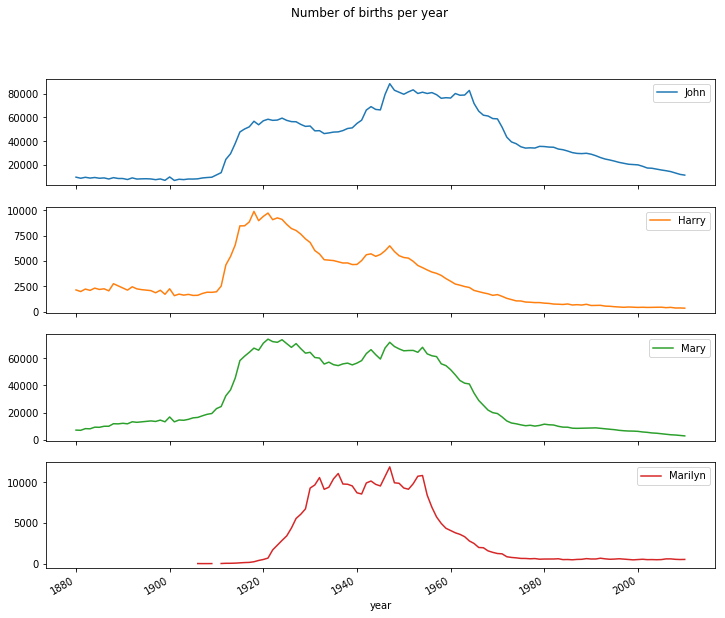

In [181]:
subset = total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots = True , figsize = (12,10),
           title = 'Number of births per year')

In [182]:
#从图中可以看出，这几个名字在美国人民的心目中已经风光不再了。
#但事实并非如此简单，我们在下一节中就能知道是怎么回事了。

In [183]:
#评估命名多样行的增长

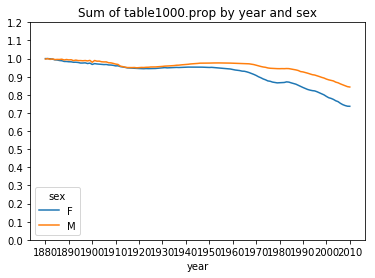

In [186]:
table = top1000.pivot_table('prop',index = 'year',columns = 'sex',
                           aggfunc = sum)
table.plot(title = 'Sum of table1000.prop by year and sex',
         yticks = np.linspace(0,1.2,13),
         xticks = range(1880,2020,10))

In [187]:
#从图中可以看出，名字的多样性确实出现了增长（前1000项的比例降低）。
#另一个办法是计算占总出生人数50%的不同名字的数量，这个数字不太好计算。我们只考虑2010年男孩的名字：
df = boys[boys.year == 2010]
df

,names,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [189]:
#在对prop降序排列后，我们想知道前面多少个名字的人数加起来才够50%。
#虽然编写一个for循环确实也能达到目的，但NumPy有一种更聪明的矢量方式。
#先计算prop的累计和cumsum，
#然后再通过searchsorted方法找出0.5应该被插在哪个位置才能保证不破坏顺序：
prop_cumsum = df.sort_values(by = 'prop',
                           ascending = False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [190]:
df = boys[boys.year ==1900]
in1900 =df.sort_values(by='prop',ascending = False).prop.cumsum()
in1900.values.searchsorted(0.5) +1

25

In [191]:
def get_quantile_count(group,q=0.5):
    group = group.sort_values(by = 'prop',ascending = False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = top1000.groupby(['year',
                             'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [192]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


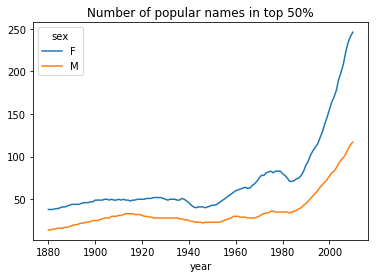

In [193]:
diversity.plot(title = 'Number of popular names in top 50%')

In [195]:
#“最后一个字母”的变革

In [201]:
get_last_letter = lambda x :x[-1]
last_letters = names.names.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births',index = last_letters,
                         columns = ['sex','year'],aggfunc = sum)
subtable = table.reindex(columns = [1910,1960,2010],
                        level = 'year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [202]:
#接下来我们需要按总出生人数对该表进行规范化处理，
#一边计算出各性别各末字母占总出生人数的比例：
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [203]:
letter_prop = subtable/subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

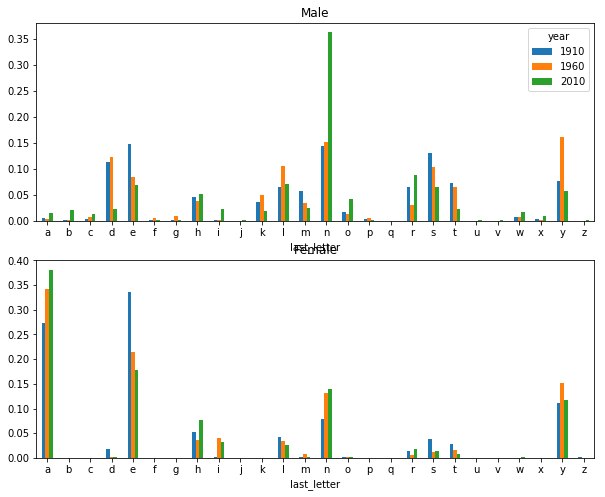

In [204]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,1,figsize = (10,8))
letter_prop['M'].plot(kind = 'bar',rot = 0,ax = axes[0],title = 'Male')
letter_prop['F'].plot(kind = 'bar',rot = 0,ax = axes[1],title = 'Female',
                     legend = False)

In [207]:
#可以看出，从20世纪60年代开始，以字母‘n’结尾的男孩名字出现了显著的增长。
#回到之前的那个完整表，按年度和性别对其进行规划范处理，
#并在男孩名字中选取几个字母，最后进行转置以便将各个列做成一个时间序列：
letter_prop = table/table.sum()
dny_ts = letter_prop.loc[['d','n','y'],'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


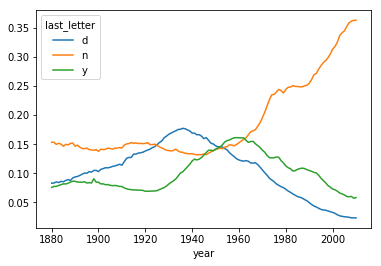

In [208]:
#有了这个时间序列的DataFrame之后，就可以通过其plot方法绘制出一张趋势图：
dny_ts.plot()

In [210]:
#变成女孩名字的男孩名字（以及相反的情况）
#另一个有趣的趋势是，早年流行于男孩的近年来“变性了”，例如Lesley或leslie。
#回到top1000数据集，找出其中以“lesl”开头的一组名字：
all_names = pd.Series(top1000.names.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [213]:
filtered = top1000[top1000.names.isin(lesley_like)]
filtered.groupby('names').births.sum()

names
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [214]:
#接下来我们按性别和年度进行聚合、并按年度进行规范化处理：
table = filtered.pivot_table('births',index = 'year',
                            columns = 'sex',aggfunc = 'sum')
table = table.div(table.sum(1),axis = 0)
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


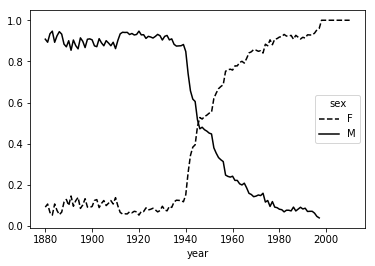

In [215]:
#最后既可以轻松绘制一张分性别的年度曲线图了：
table.plot(style = {'M':'k-','F':'k--'})

In [216]:
import json
db = json.load(open('datasets/usda_food/database.json'))
len(db)

6636

In [217]:
#db中的每个条目都是一条含有某种食物全部数据的字典。
#nutrients字段是一个字典列表，期中的每个字典对应一种营养成分：
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [218]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [219]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [221]:
#在将字典列表转换成DataFrame时，可以只抽取其中的一部分字段。
#这里，我们将取出食物的名称、分类、编号以及制造商等信息：
info_keys = ['description','group','id','manufacturer']
info = pd.DataFrame(db,columns = info_keys)
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [222]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [223]:
#通过value_counts，你可以查看食物类别的分布情况：
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [226]:
#现在，为了对全部营养数据做一些分析，
#最简单的方法就是将所有食物的营养成分整合到一个大表中。
#我们分几个步骤来实现该目的。
#首先，将各食物的营养成分列表转换成一个DataFrame，
#并添加一个表示编号的列，然后将该DataFrame添加到一个列表中，
#最后通过concat将这些东西连接起来就可以：
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
...,...,...,...,...,...
389350,"Vitamin B-12, added",Vitamins,mcg,0.000,43546
389351,Cholesterol,Other,mg,0.000,43546
389352,"Fatty acids, total saturated",Other,g,0.072,43546
389353,"Fatty acids, total monounsaturated",Other,g,0.028,43546


In [227]:
#我们发现这个FataFrame中无论如何都会有依稀额重复项，所以直接丢弃就可以了：
nutrients.duplicated().sum()

14179

In [229]:
nutrients = nutrients.drop_duplicates()
col_mapping = {'description':'food',
              'group':'fgroup'}
info = info.rename(columns = col_mapping,copy = False)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
food            6636 non-null object
fgroup          6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [230]:
col_mapping = {'destription':'nutrient',
              'group':'nutgroup'}
nutrients = nutrients.rename(columns = col_mapping,copy = False)
nutrients

,description,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
...,...,...,...,...,...
389350,"Vitamin B-12, added",Vitamins,mcg,0.000,43546
389351,Cholesterol,Other,mg,0.000,43546
389352,"Fatty acids, total saturated",Other,g,0.072,43546
389353,"Fatty acids, total monounsaturated",Other,g,0.028,43546


In [257]:
#做完这些，就可以将info和nutrients合并起来：
ndata = pd.merge(nutrients,info,on = 'id',how = 'outer')
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
nutrient        375176 non-null object
nutgroup        375176 non-null object
units           375176 non-null object
value           375176 non-null float64
id              375176 non-null int64
food            375176 non-null object
fgroup          375176 non-null object
manufacturer    293054 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [258]:
ndata.iloc[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [252]:
nutrients.duplicated().sum()  # number of duplicates
nutrients = nutrients.drop_duplicates()

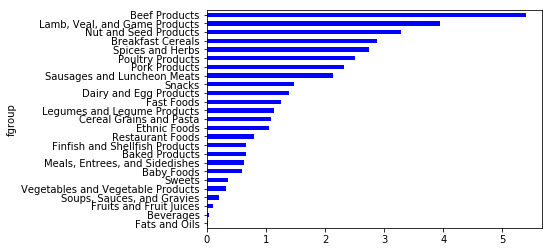

In [260]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh',color = 'blue')

In [261]:
by_nutrient = ndata.groupby(['nutgroup','nutrient'])
get_maximum = lambda x :x.loc[x.value.idxmax()]
get_minimum = lambda x :x.loc[x.value.idxmin()]
max_foods = by_nutrient.apply(get_maximum)[['value','food']]
max_foods.food = max_foods.food.str[:50]
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                          Gelatins, dry powder, unsweetened
Arginine                              Seeds, sesame flour, low-fat
Aspartic acid                                  Soy protein isolate
Cystine               Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                  Soy protein isolate
                                       ...                        
Serine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Threonine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Tryptophan        Sea lion, Steller, meat with fat (Alaska Native)
Tyrosine         Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Valine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Name: food, Length: 19, dtype: object

In [262]:
#14.5 2012联邦选举委员会数据库
fec = pd.read_csv('datasets/fec/P00000001-ALL.csv')
fec.info()

D:\Users\admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [263]:
fec.iloc[123456]

cmte_id             C00431445
cand_id             P80003338
cand_nm         Obama, Barack
contbr_nm         ELLMAN, IRA
contbr_city             TEMPE
                    ...      
receipt_desc              NaN
memo_cd                   NaN
memo_text                 NaN
form_tp                 SA17A
file_num               772372
Name: 123456, Length: 16, dtype: object

In [264]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [265]:
unique_cands[2]

'Obama, Barack'

In [266]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [267]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [269]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [271]:
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [272]:
#这里有两个需要注意的地方
#第一，改数据既包括赞助也包括退款（负的出资额）：
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [273]:
#为了简化过程，我限定该数据集只能有正的出资额：
fec = fec[fec.contb_receipt_amt > 0]
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]

In [274]:
#根据职业和雇主统计赞助信息
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [275]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [276]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [278]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                               index = 'contbr_occupation',
                                columns ='party',
                               aggfunc = 'sum')

In [279]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
...,...,...
PRESIDENT,1878509.95,4.720924e+06
PROFESSOR,2165071.08,2.967027e+05
REAL ESTATE,528902.09,1.625902e+06


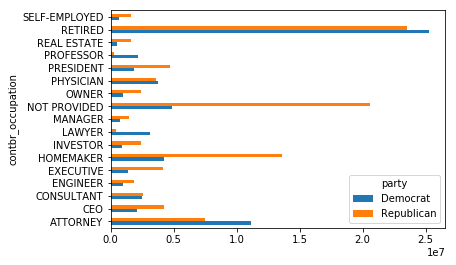

In [280]:
over_2mm.plot(kind = 'barh')

In [281]:
def get_top_amounts(group,key,n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts,'contbr_occupation',n=7)

cand_nm        contbr_occupation    
Obama, Barack  RETIRED                  25305116.38
               ATTORNEY                 11141982.97
               INFORMATION REQUESTED     4866973.96
               HOMEMAKER                 4248875.80
               PHYSICIAN                 3735124.94
                                           ...     
Romney, Mitt   HOMEMAKER                 8147446.22
               ATTORNEY                  5364718.82
               PRESIDENT                 2491244.89
               EXECUTIVE                 2300947.03
               C.E.O.                    1968386.11
Name: contb_receipt_amt, Length: 14, dtype: float64

In [282]:
grouped.apply(get_top_amounts,'contbr_employer',n=10)

cand_nm        contbr_employer      
Obama, Barack  RETIRED                  22694358.85
               SELF-EMPLOYED            17080985.96
               NOT EMPLOYED              8586308.70
               INFORMATION REQUESTED     5053480.37
               HOMEMAKER                 2605408.54
                                           ...     
Romney, Mitt   CREDIT SUISSE              281150.00
               MORGAN STANLEY             267266.00
               GOLDMAN SACH & CO.         238250.00
               BARCLAYS CAPITAL           162750.00
               H.I.G. CAPITAL             139500.00
Name: contb_receipt_amt, Length: 20, dtype: float64

In [283]:
#对出资额分组
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt,bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [285]:
#现在可以根据候选人姓名以及面元标签对奥巴马和罗姆尼数据进行分组
#，以便得到一个柱状图：
grouped = fec_mrbo.groupby(['cand_nm',labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [286]:
#从这个数据中可以看出，在小额赞助方面，Obama获得的数量比Romney多得多。
#你还可以对出资额求和并在面元内规格化，以便图形化两位候选人各种赞助额度的比例：
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis = 1),
                             axis = 0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


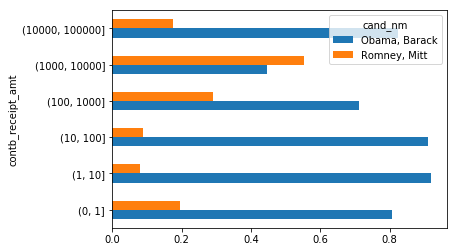

In [289]:
normed_sums[:-2].plot(kind='barh')

In [292]:
#根据州统计赞助信息
#根据候选人和州对数据进行聚合是常规操作：
grouped = fec_mrbo.groupby(['cand_nm','contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [293]:
#如果对各行除以总赞助额，就会得到各候选人在各州的总赞助额比例：
percent = totals.div(totals.sum(1),axis = 0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


In [294]:
#14.6总结
#end